In [13]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import tur_calculator as tc
import plotting_machine as pm

In [14]:
#--SETUP1: ---------------------------------------------------------------------------------
path_name = "vb_eps_-3_3_200/all_values.npz"
VBs = np.linspace(-3, 3, 200) # np.linspace(-3,3, 200)
epsilons = np.linspace(-3, 3, 200) # np.linspace(-3, 3, 200)
lamdas = np.linspace(0, 0.24, 10)

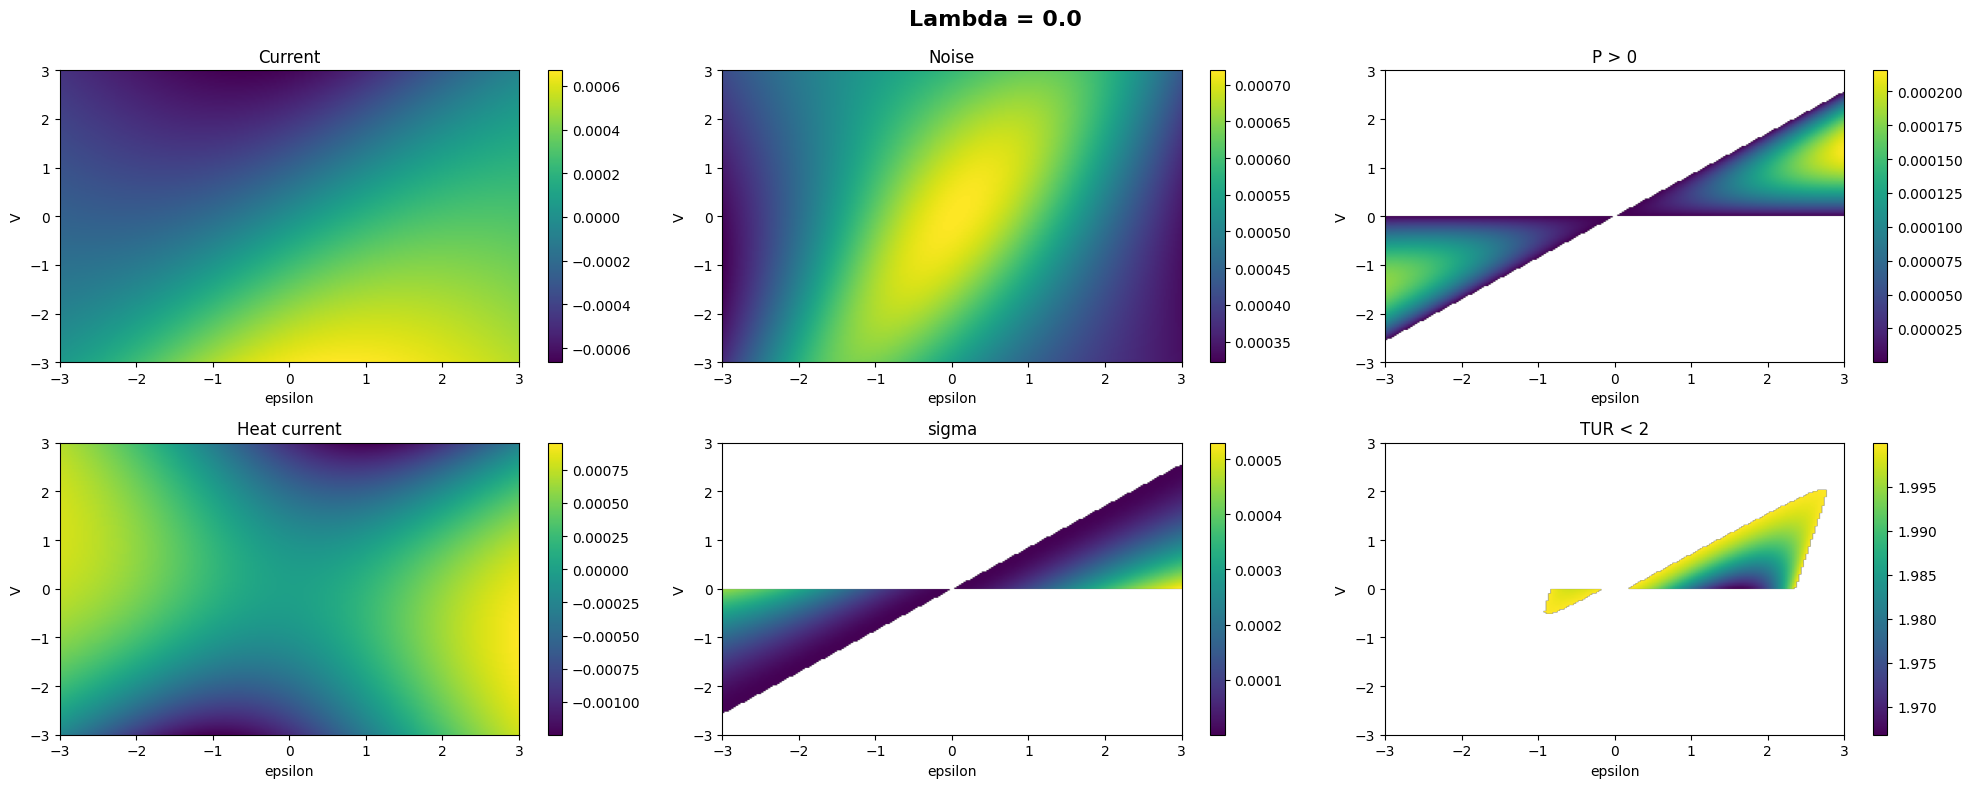

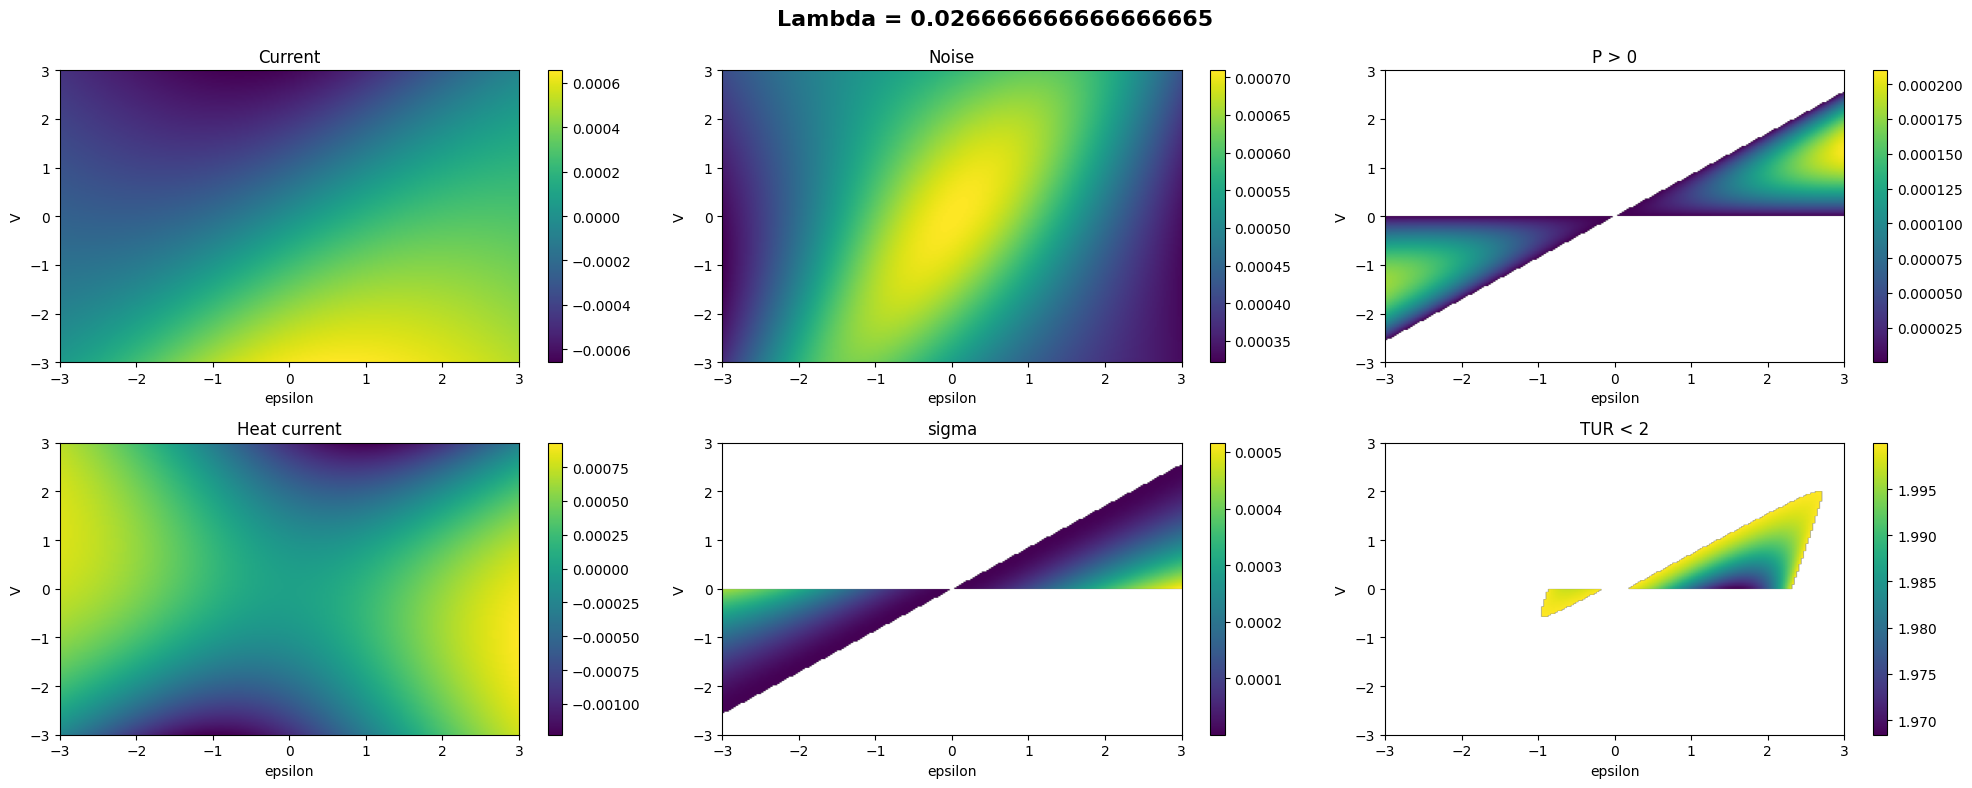

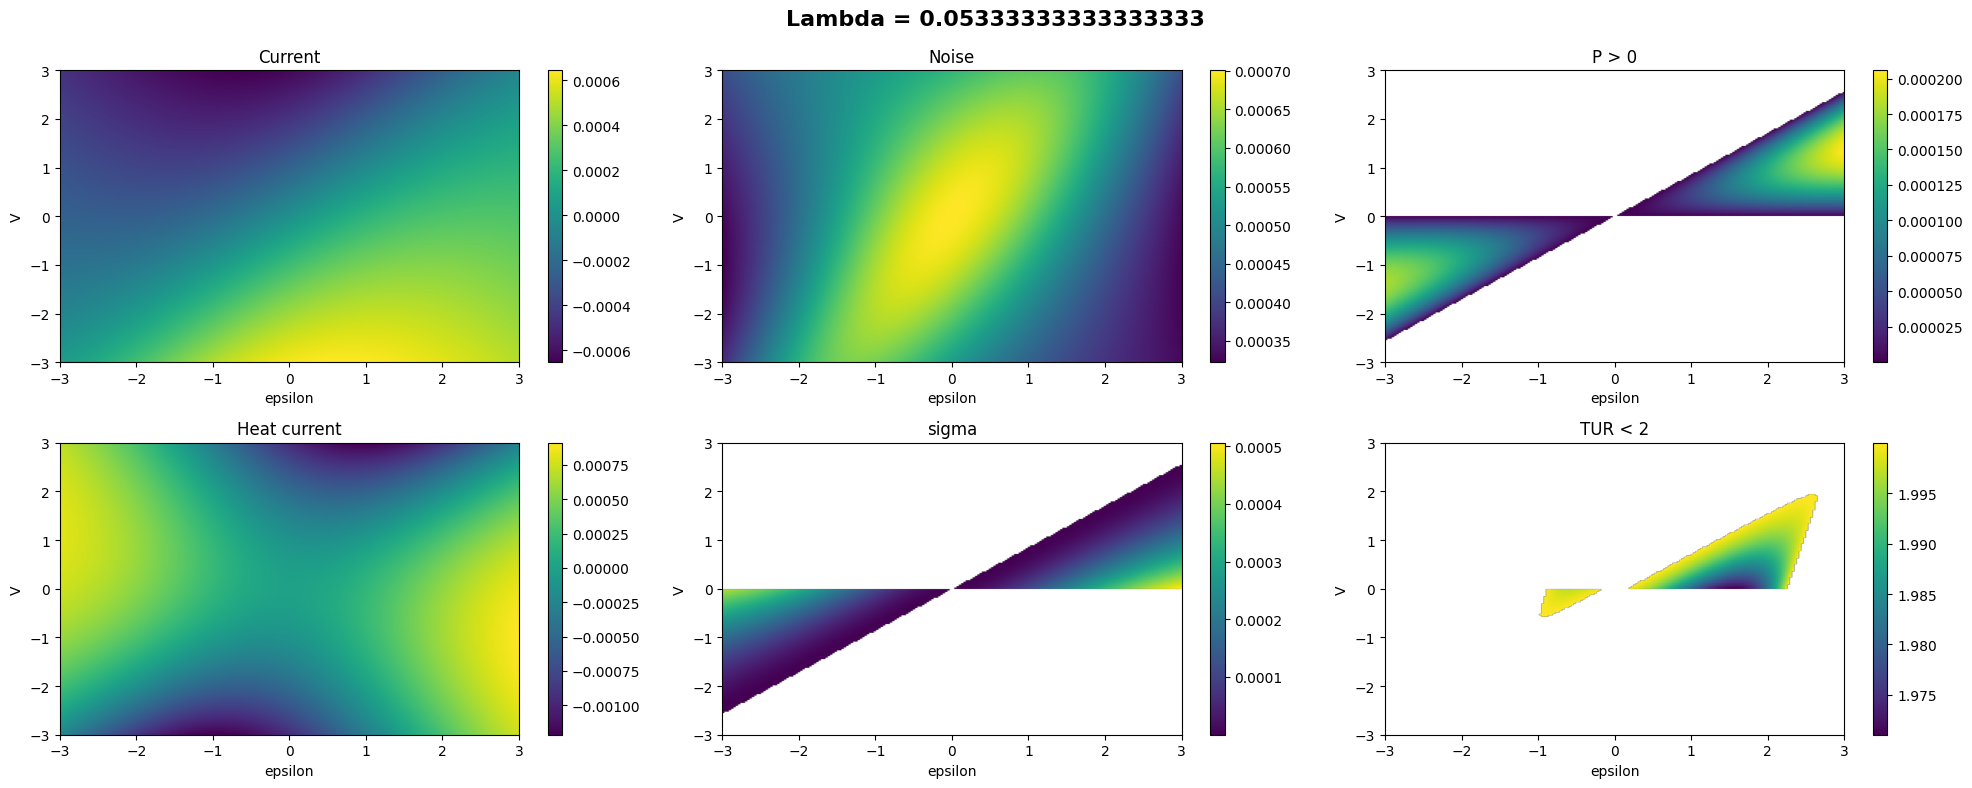

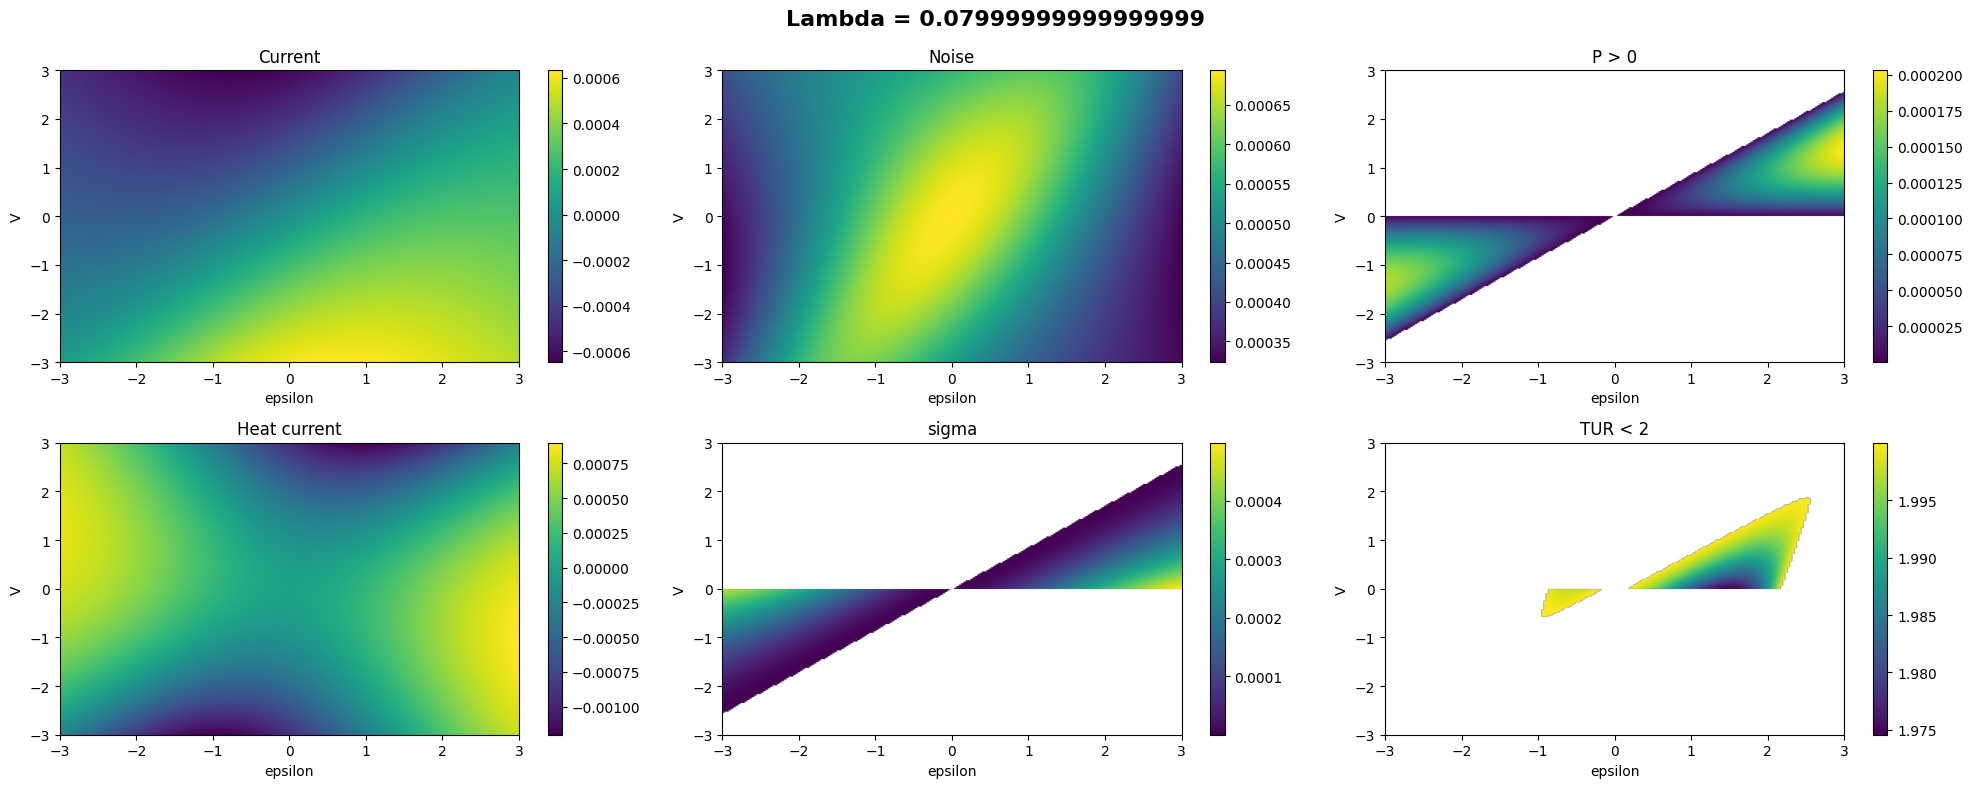

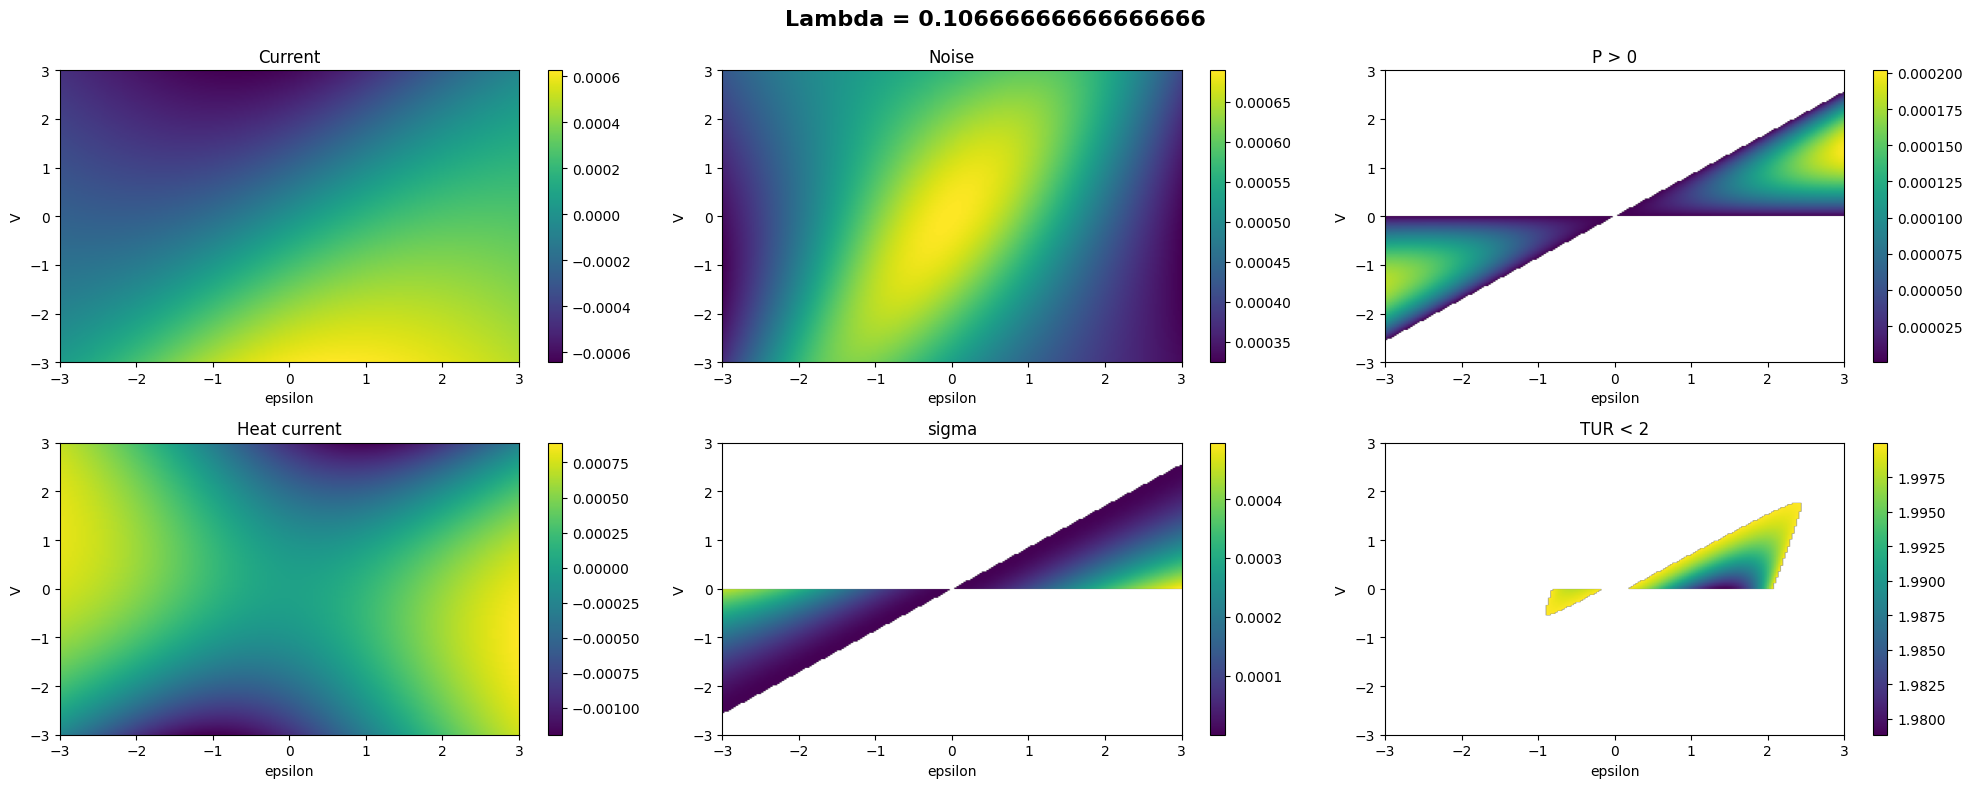

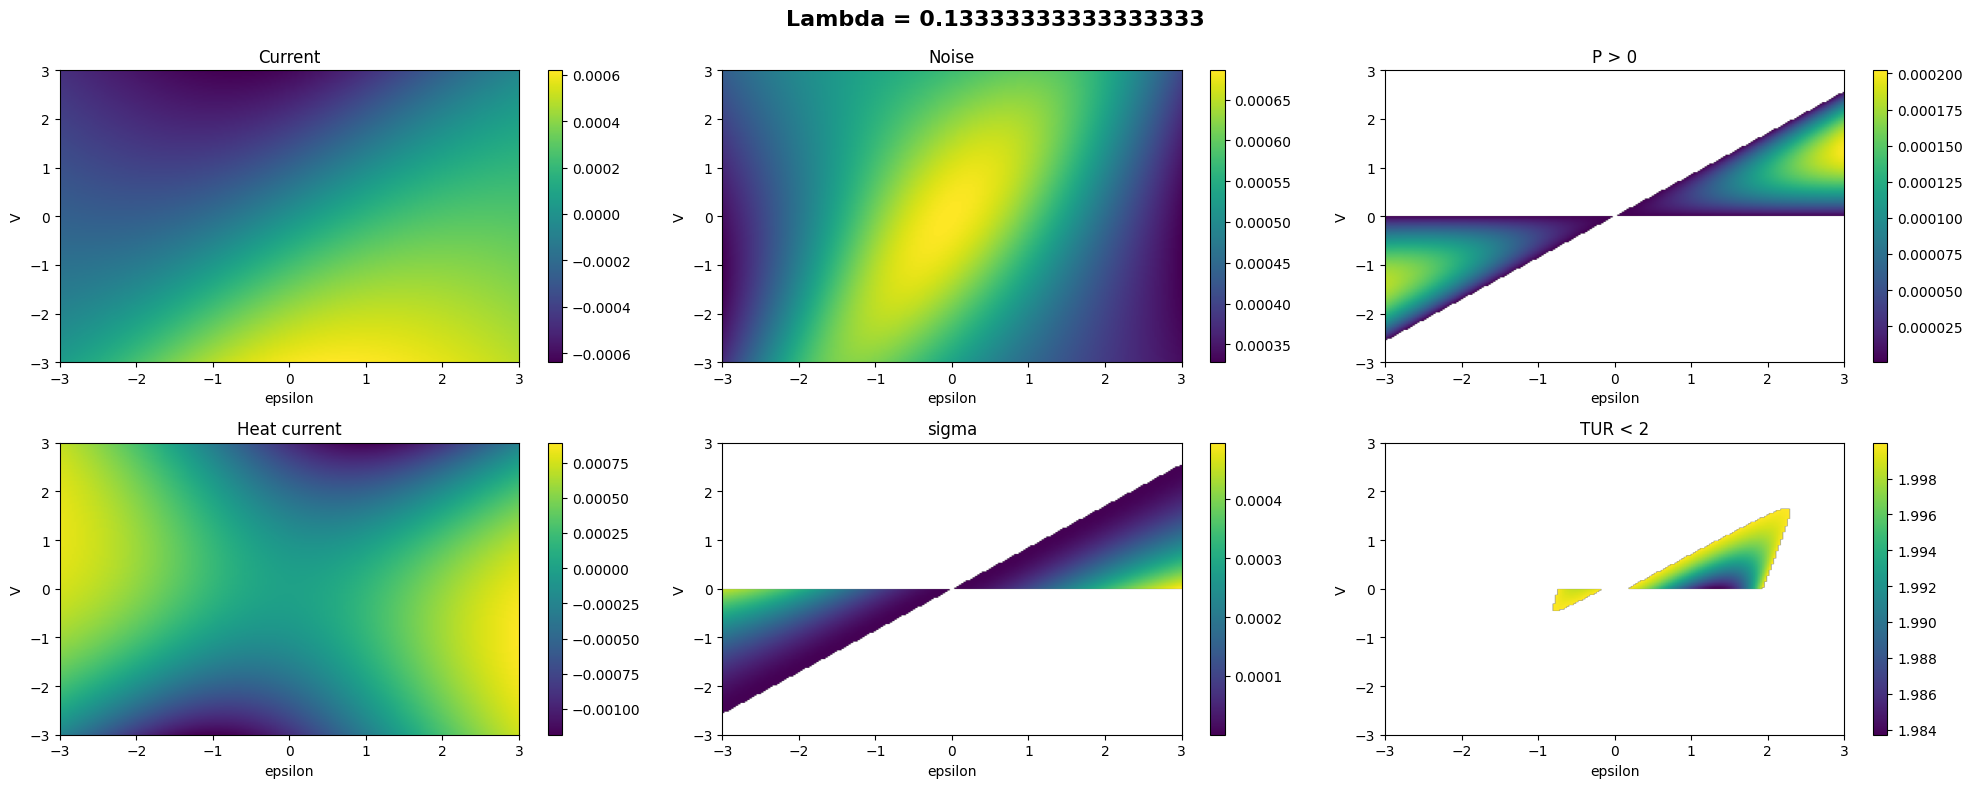

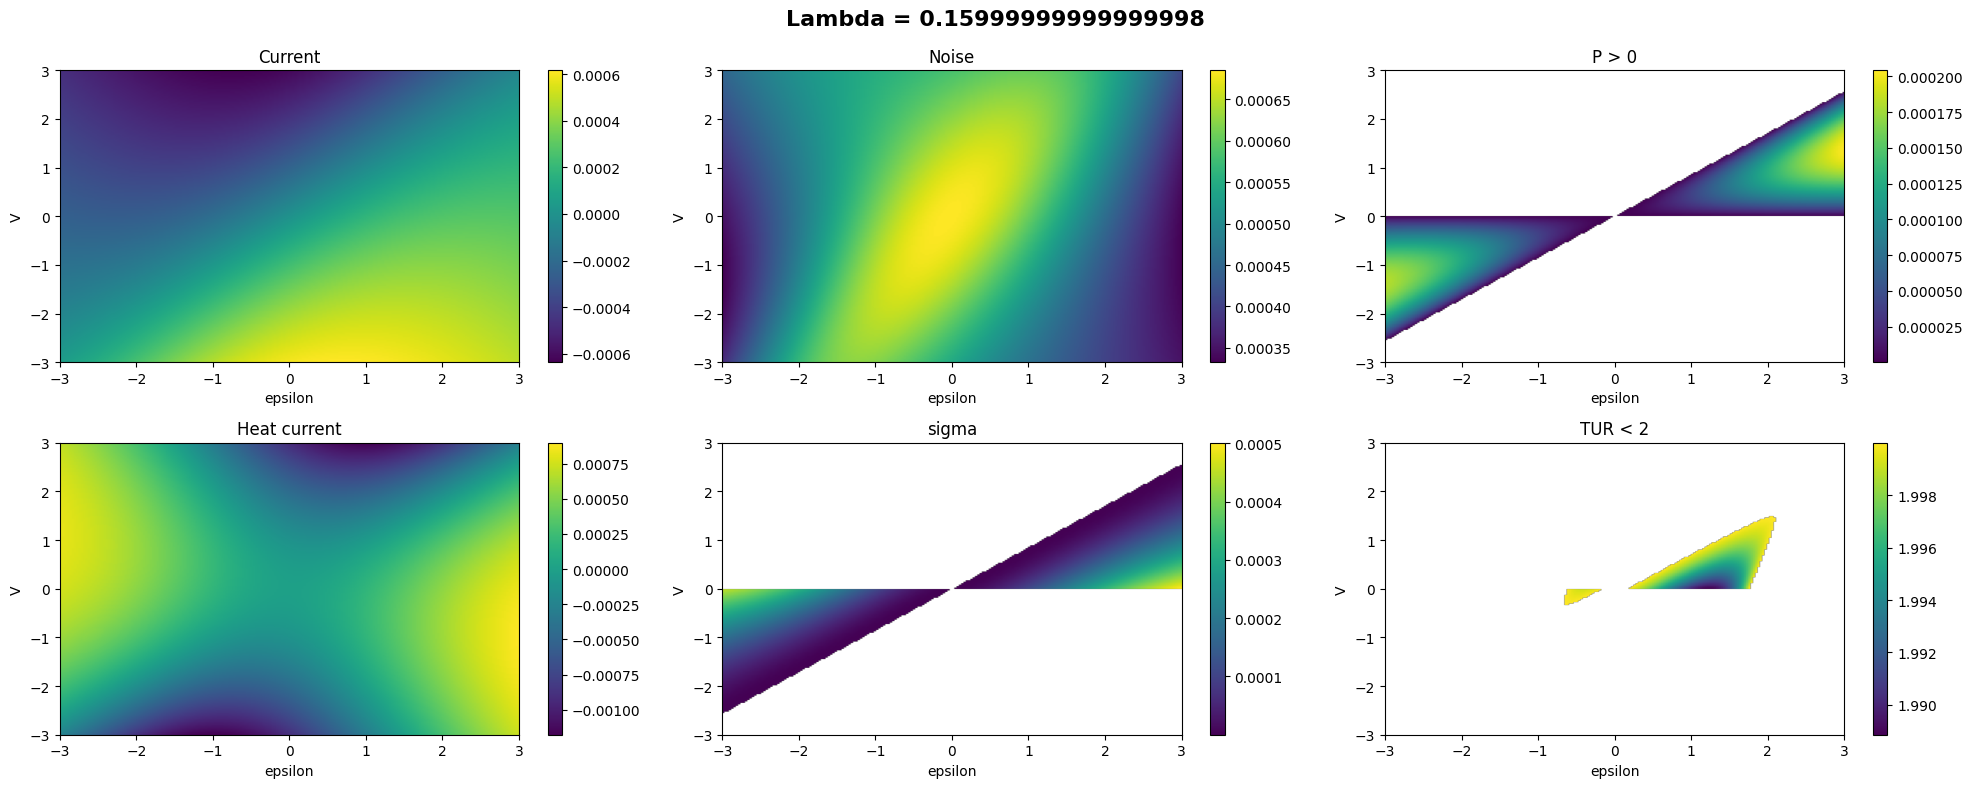

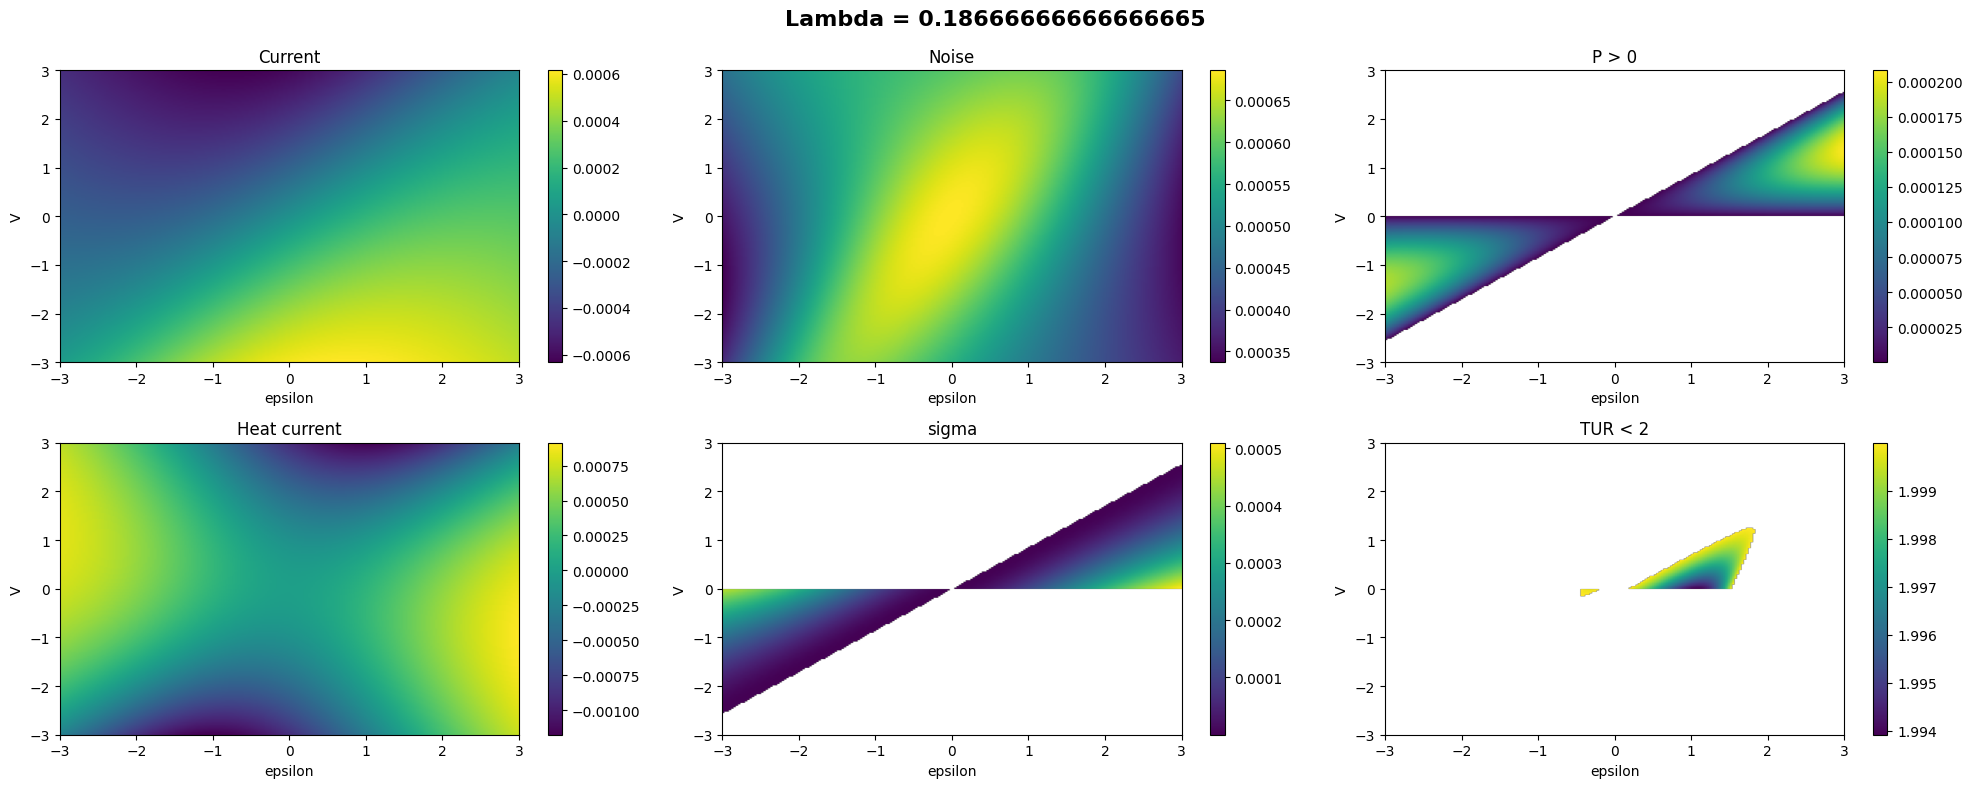

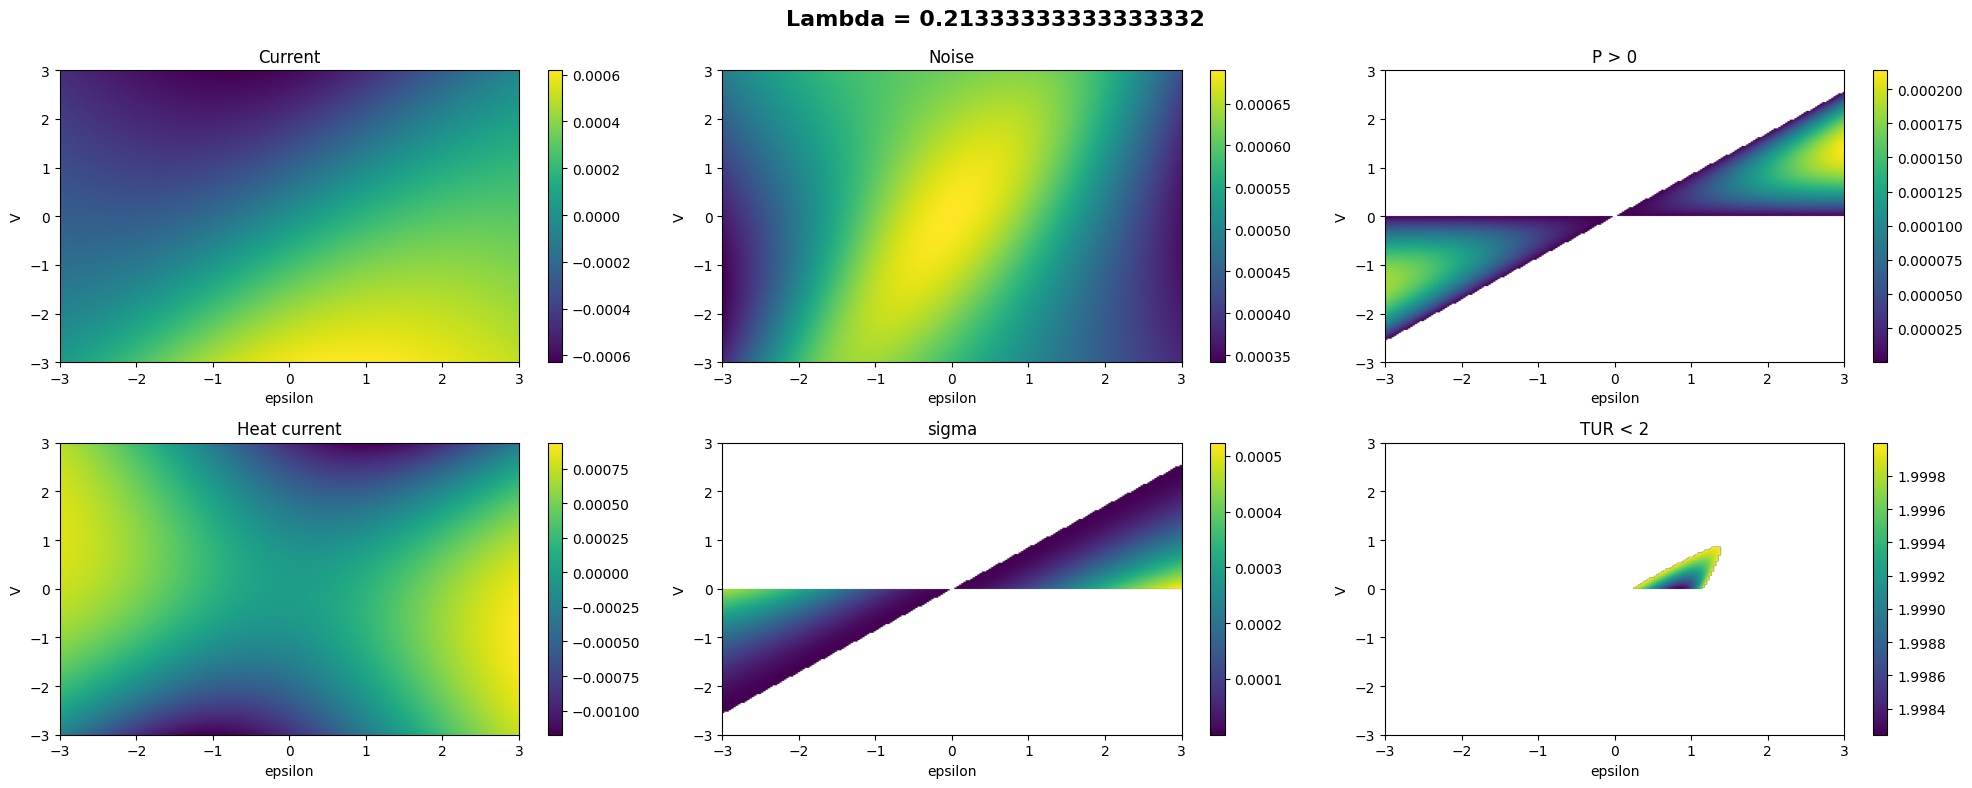

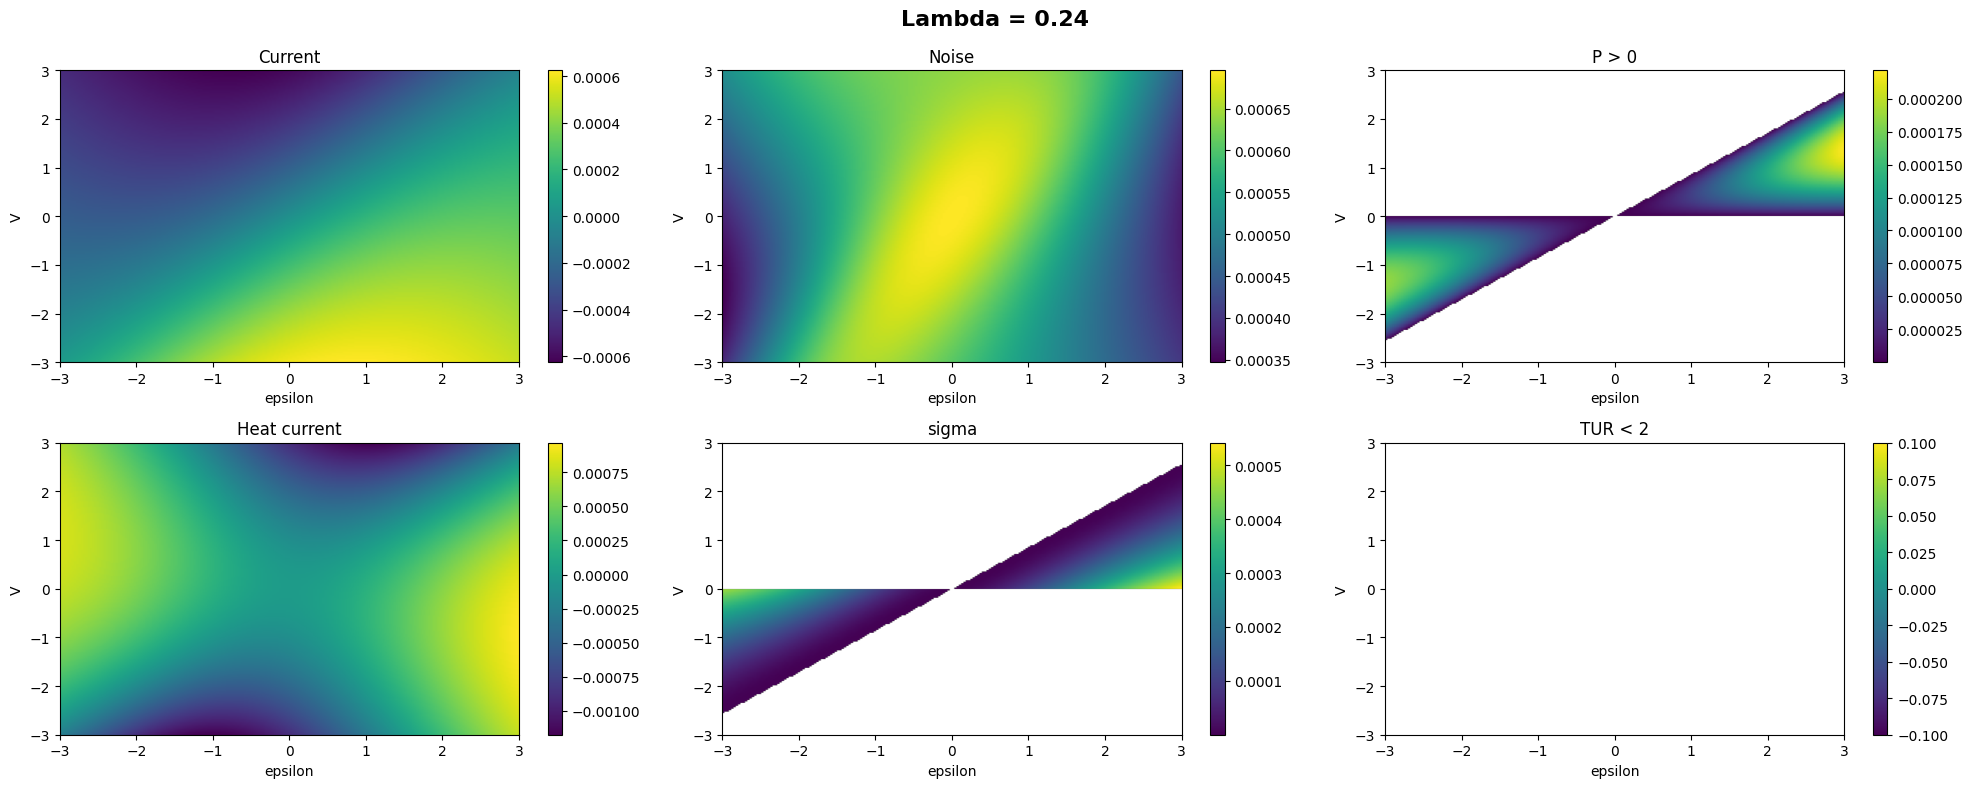

In [ ]:
#--SETUP2: ---------------------------------------------------------------------------------

T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

importlib.reload(vs)
importlib.reload(tc)
importlib.reload(pm)

Is = []
I_vars = []
J_QHs = []
Ps = []
TURs = []
effs = []
sigmas = []



for lmda in lamdas:
    I, I_var, J_QH, P = vs.run_lamda_sweep(VBs, epsilons, lmda, **INPUT)
    TUR, _, eff, sigma = tc.calculate_tur(T_L, T_R, I, I_var, J_QH, P)
    Is.append(I)
    I_vars.append(I_var)
    J_QHs.append(J_QH)
    Ps.append(P)
    TURs.append(TUR)
    effs.append(eff)
    sigmas.append(sigma)
    pm.plot_all(epsilons, VBs, I, I_var, P, J_QH, sigma, TUR, f"Lambda = {lmda}")

#Save to file:
#np.savez(path_name, Is=Is, I_vars=I_vars, J_QHs=J_QHs, Ps=Ps, TURs=TURs, effs=effs, sigmas=sigmas)

In [15]:
#=========================================Read from file:===============================================================
data = np.load(path_name)
Is, I_vars, Ps, J_QHs, sigmas, TURs, effs = data['Is'], data['I_vars'], data['Ps'], data['J_QHs'], data['sigmas'], data['TURs'], data['effs']


In [18]:
print(TURs.shape)

(10, 200, 200)


In [17]:
I_array = []
I_var_array = []
J_QH_array = []
P_array = []
TUR_array_fixed = []
TUR_array_floating = []
eff_array = []
sigma_array = []

Epsilon, VB = np.meshgrid(epsilons, VBs)

TUR_temp = TURs[0]
min_TUR = np.nanmin(TUR_temp)
print(min_TUR)
min_indices = np.argwhere(TUR_temp == min_TUR)
if len(min_indices) > 1:
    raise ValueError("More than one minimal value!")
min_x = min_indices[0][0]
min_y = min_indices[0][1]

for idx, lmda in enumerate(lamdas):
    I = Is[idx]
    I_var = I_vars[idx]
    J_QH = J_QHs[idx]
    P = Ps[idx]
    TUR = TURs[idx]
    eff = effs[idx]
    sigma = sigmas[idx]
    #print("Min TUR: ", TUR[min_x, min_y])
    #print(f"\tat: epsilon: {Epsilon[min_x, min_y]} and VB: {VB[min_x, min_y]}")
    #print("\t Power here: ", P[min_x, min_y])
    I_array.append(I[min_x, min_y])
    I_var_array.append(I_var[min_x, min_y])
    J_QH_array.append(J_QH[min_x, min_y])
    P_array.append(P[min_x, min_y])
    TUR_array_fixed.append(TUR[min_x, min_y])
    eff_array.append(eff[min_x, min_y])
    sigma_array.append(sigma[min_x, min_y])

for idx, lmda in enumerate(lamdas):
    TUR_temp = TURs[idx]
    min_TUR = np.nanmin(TUR_temp)
    min_indices = np.argwhere(TUR_temp == min_TUR)
    if len(min_indices) > 1:
        raise ValueError("More than one minimal value!")
    min_x = min_indices[0][0]
    min_y = min_indices[0][1]
    print("Min TUR: ", TUR[min_x, min_y])
    print(f"\tat: epsilon: {Epsilon[min_x, min_y]} and VB: {VB[min_x, min_y]}")
    print("\t Power here: ", P[min_x, min_y])
    TUR_array_floating.append(min_TUR)


1.9668188041184926
Min TUR:  2.0241950545102254
	at: epsilon: 1.6130653266331656 and VB: 0.015075376884421843
	 Power here:  3.939010291060667e-06
Min TUR:  2.022527437189523
	at: epsilon: 1.582914572864321 and VB: 0.015075376884421843
	 Power here:  3.89681784846429e-06
Min TUR:  2.0209415682220366
	at: epsilon: 1.5527638190954773 and VB: 0.015075376884421843
	 Power here:  3.853215308820832e-06
Min TUR:  2.0180074139111475
	at: epsilon: 1.492462311557789 and VB: 0.015075376884421843
	 Power here:  3.7617631783872247e-06
Min TUR:  2.0153769358505116
	at: epsilon: 1.4321608040201 and VB: 0.015075376884421843
	 Power here:  3.664629561308595e-06
Min TUR:  2.011965108242102
	at: epsilon: 1.341708542713568 and VB: 0.015075376884421843
	 Power here:  3.508261203275249e-06
Min TUR:  2.0083240285350916
	at: epsilon: 1.2211055276381906 and VB: 0.015075376884421843
	 Power here:  3.2799411337165917e-06
Min TUR:  2.0050345672659935
	at: epsilon: 1.0703517587939695 and VB: 0.015075376884421843
	

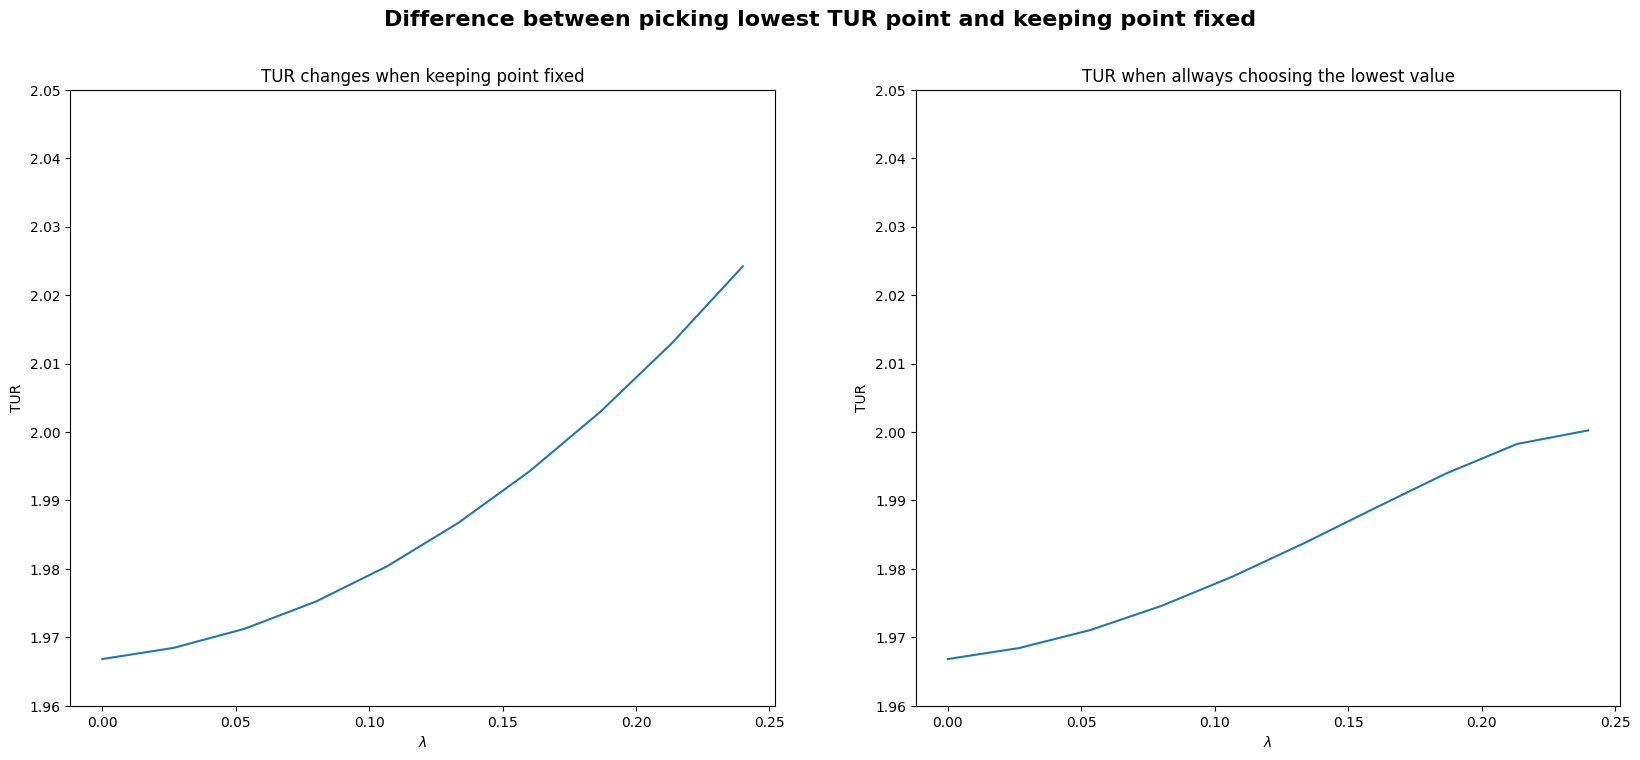

In [11]:
"ys should be list/tuple with two entrys and y_names containes the corresponding names"
importlib.reload(pm)
pm.plot_two(lamdas, r"$\lambda$", (TUR_array_fixed, TUR_array_floating),
            ("TUR", "TUR"),
             ("TUR changes when keeping point fixed", "TUR when allways choosing the lowest value"),
               "Difference between picking lowest TUR point and keeping point fixed")

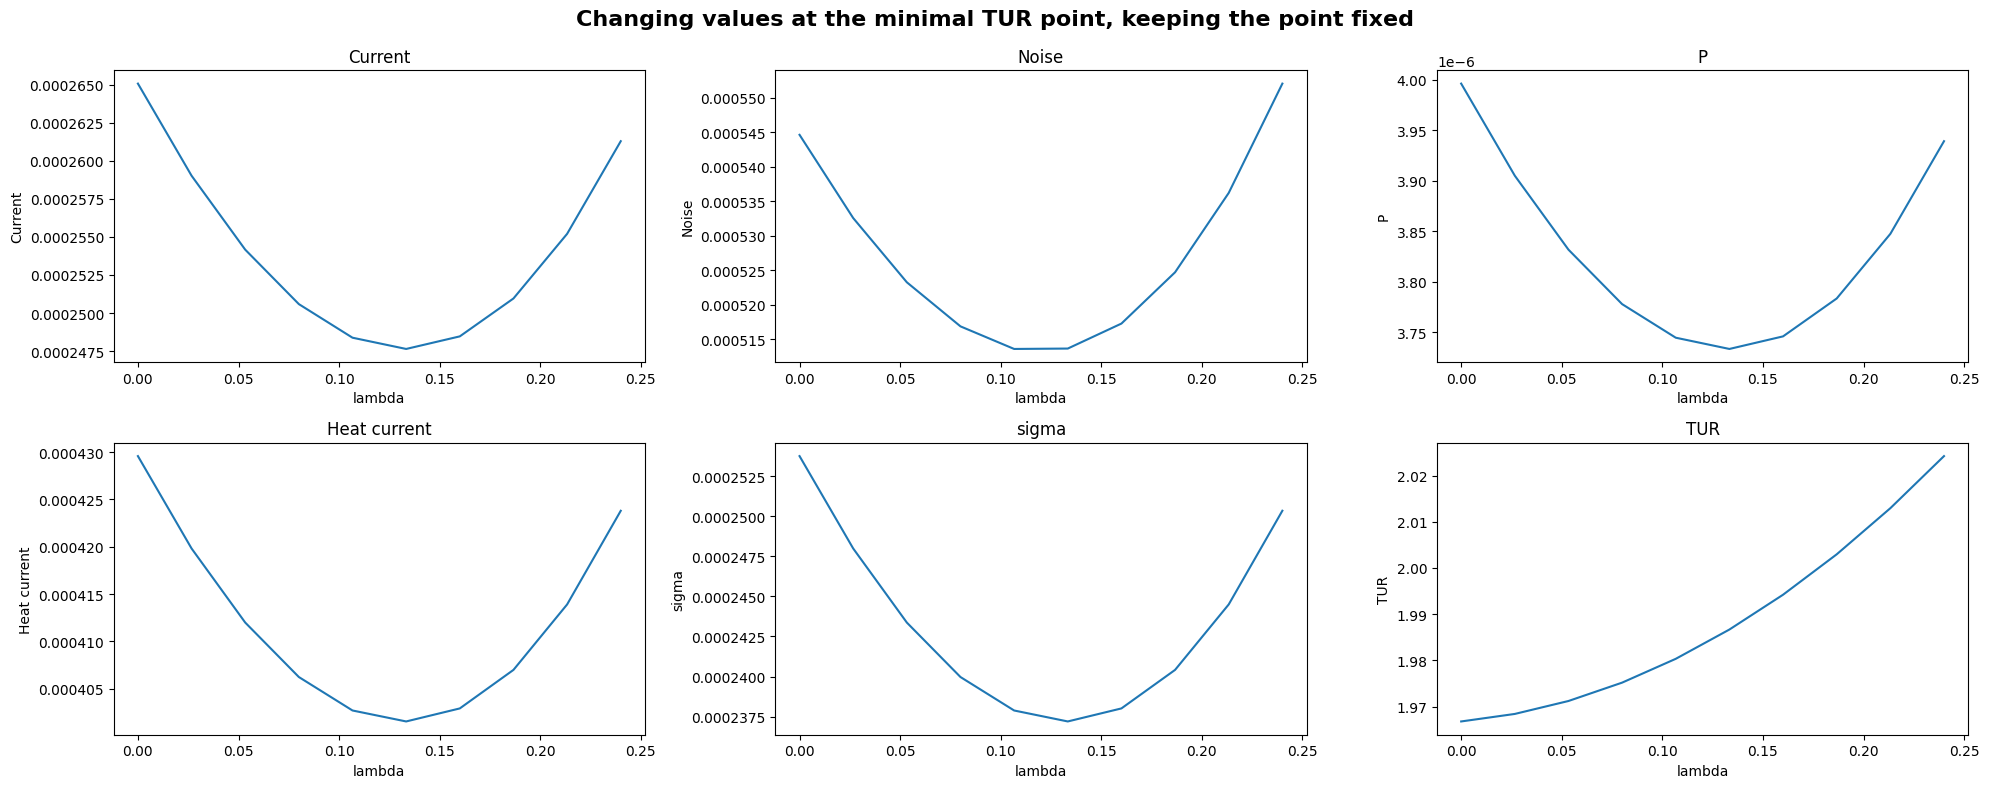

In [12]:
importlib.reload(pm)
pm.plot_inter(lamdas, I_array, I_var_array, P_array, J_QH_array, sigma_array, TUR_array_fixed,
               "Changing values at the minimal TUR point, keeping the point fixed")